In [5]:
import osmnx as ox
import simplekml # A package used for generating KML files

### Test 1: Not simplifying graph

C:\Users\98245\AppData\Local\Temp\ipykernel_49476\1927788453.py:14: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)


Total Edge Length: 301785.79600000015


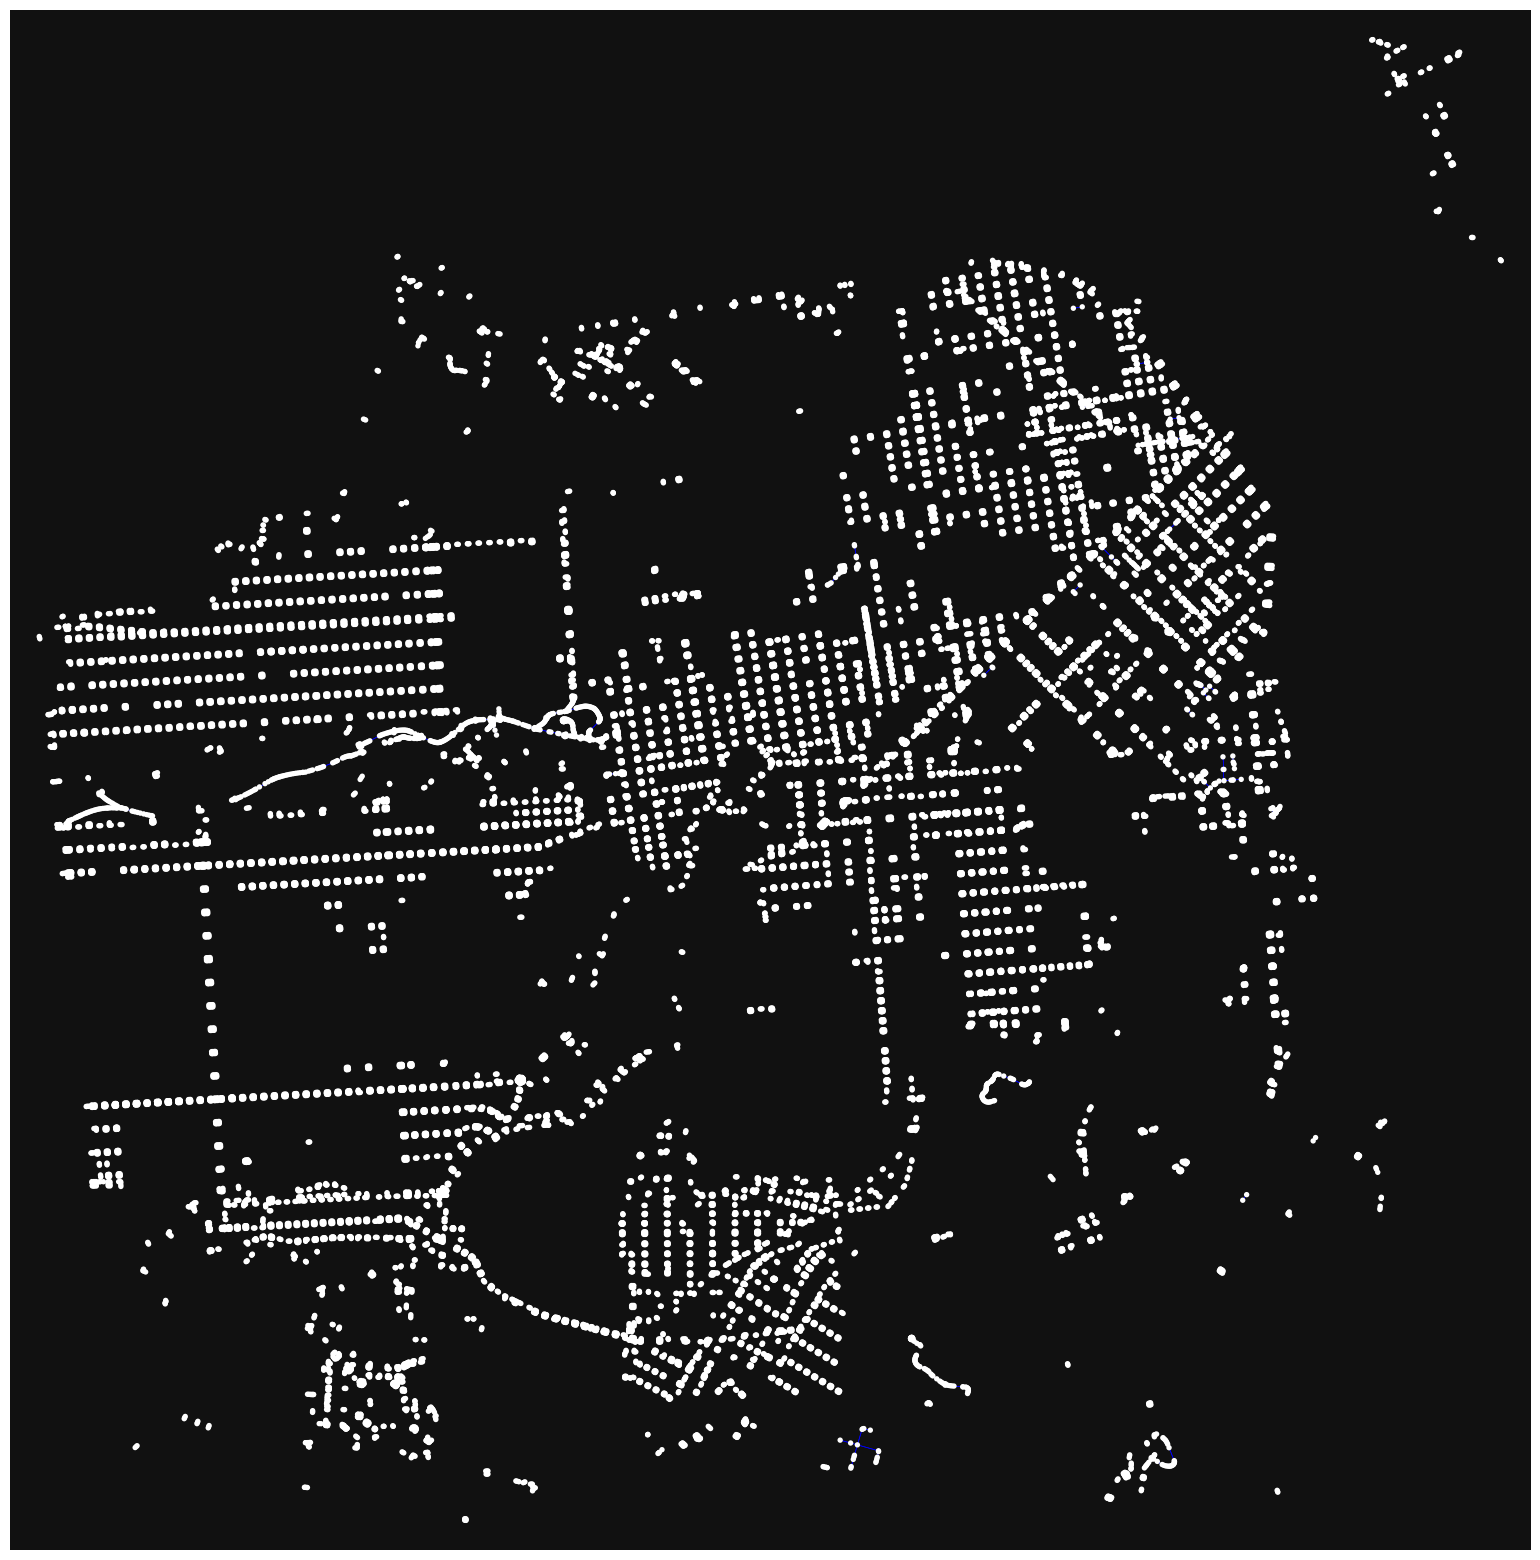

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [3]:
# Set console logging to True
ox.settings.log_console = True

# Set useful tags for walking network
useful_tags = ox.settings.useful_tags_way + [
    'crossing', 'crossing:uncontrolled', 'crossing:zebra', 'crossing:marked',
    'crossing:traffic_signals', 'crossing:school', 'crossing:island',
    'crossing:refuge_island', 'crossing:island:central',
    'crossing:island:central:traffic_signals', 'crossing:island:central:marked',
    'crossing:island:central:zebra', 'crossing:unmarked', 'highway:crossing',
    'pedestrian', 'footway', 'pedestrian_crossing'
]

ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# Download the network with specified tags
G = ox.graph_from_place(query='San Francisco, California, USA', network_type='walk', simplify=False, retain_all=True)


# Identify and remove non-walk edges
non_walk = []
for u, v, k, d in G.edges(keys=True, data=True):
    is_walk = "walk" in d and d["walk"] == "designated"
    is_crossing = (
        d.get("highway") in ["crossing", "pedestrian"] or
        "crossing" in d or
        any(tag.lower() == "crossing:uncontrolled" for tag in d) or
        "crossing:raised" in d or
        "crossing:speed_table" in d or
        "crossing:hump" in d or
        "crossing:zebra" in d or
        "crossing:marked" in d or
        "crossing:traffic_signals" in d or
        "crossing:school" in d or
        "crossing:island" in d or
        "crossing:refuge_island" in d or
        "crossing:island:central" in d or
        "crossing:central_island" in d or
        "crossing:island:central:traffic_signals" in d or
        "crossing:island:central:marked" in d or
        "crossing:island:central:zebra" in d or
        "crossing:island:central:uncontrolled" in d or
        "crossing:island:central:unmarked" in d or
        "crossing:unmarked" in d or
        "highway:crossing" in d or
        "pedestrian" in d
    )
    
    # Include pedestrian crossings at intersections without traffic signals
    is_intersection = "highway" in d and d["highway"] == "uncontrolled_intersection"
    if is_intersection and not is_crossing:
        is_crossing = True

    # Exclude pedestrian sidewalks
    is_sidewalk = "sidewalk" in d
    if not is_walk and not is_crossing and not is_sidewalk:
        non_walk.append((u, v, k))

G.remove_edges_from(non_walk)
# G = ox.utils_graph.remove_isolated_nodes(G)
# G = ox.simplify_graph(G)

# Calculate and print total edge length
stats = ox.stats.basic_stats(G)
print("Total Edge Length:", stats["edge_length_total"])

# Plot the graph
ox.plot_graph(G, node_color="w", node_size=15, edge_color="b", edge_linewidth=0.5, figsize=(20, 20))



### Test 2: Retrieving network with network_type "all" instead of "walk" and not simplifying graph

C:\Users\98245\AppData\Local\Temp\ipykernel_49476\481120598.py:14: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)


Total Edge Length: 303055.6870000003


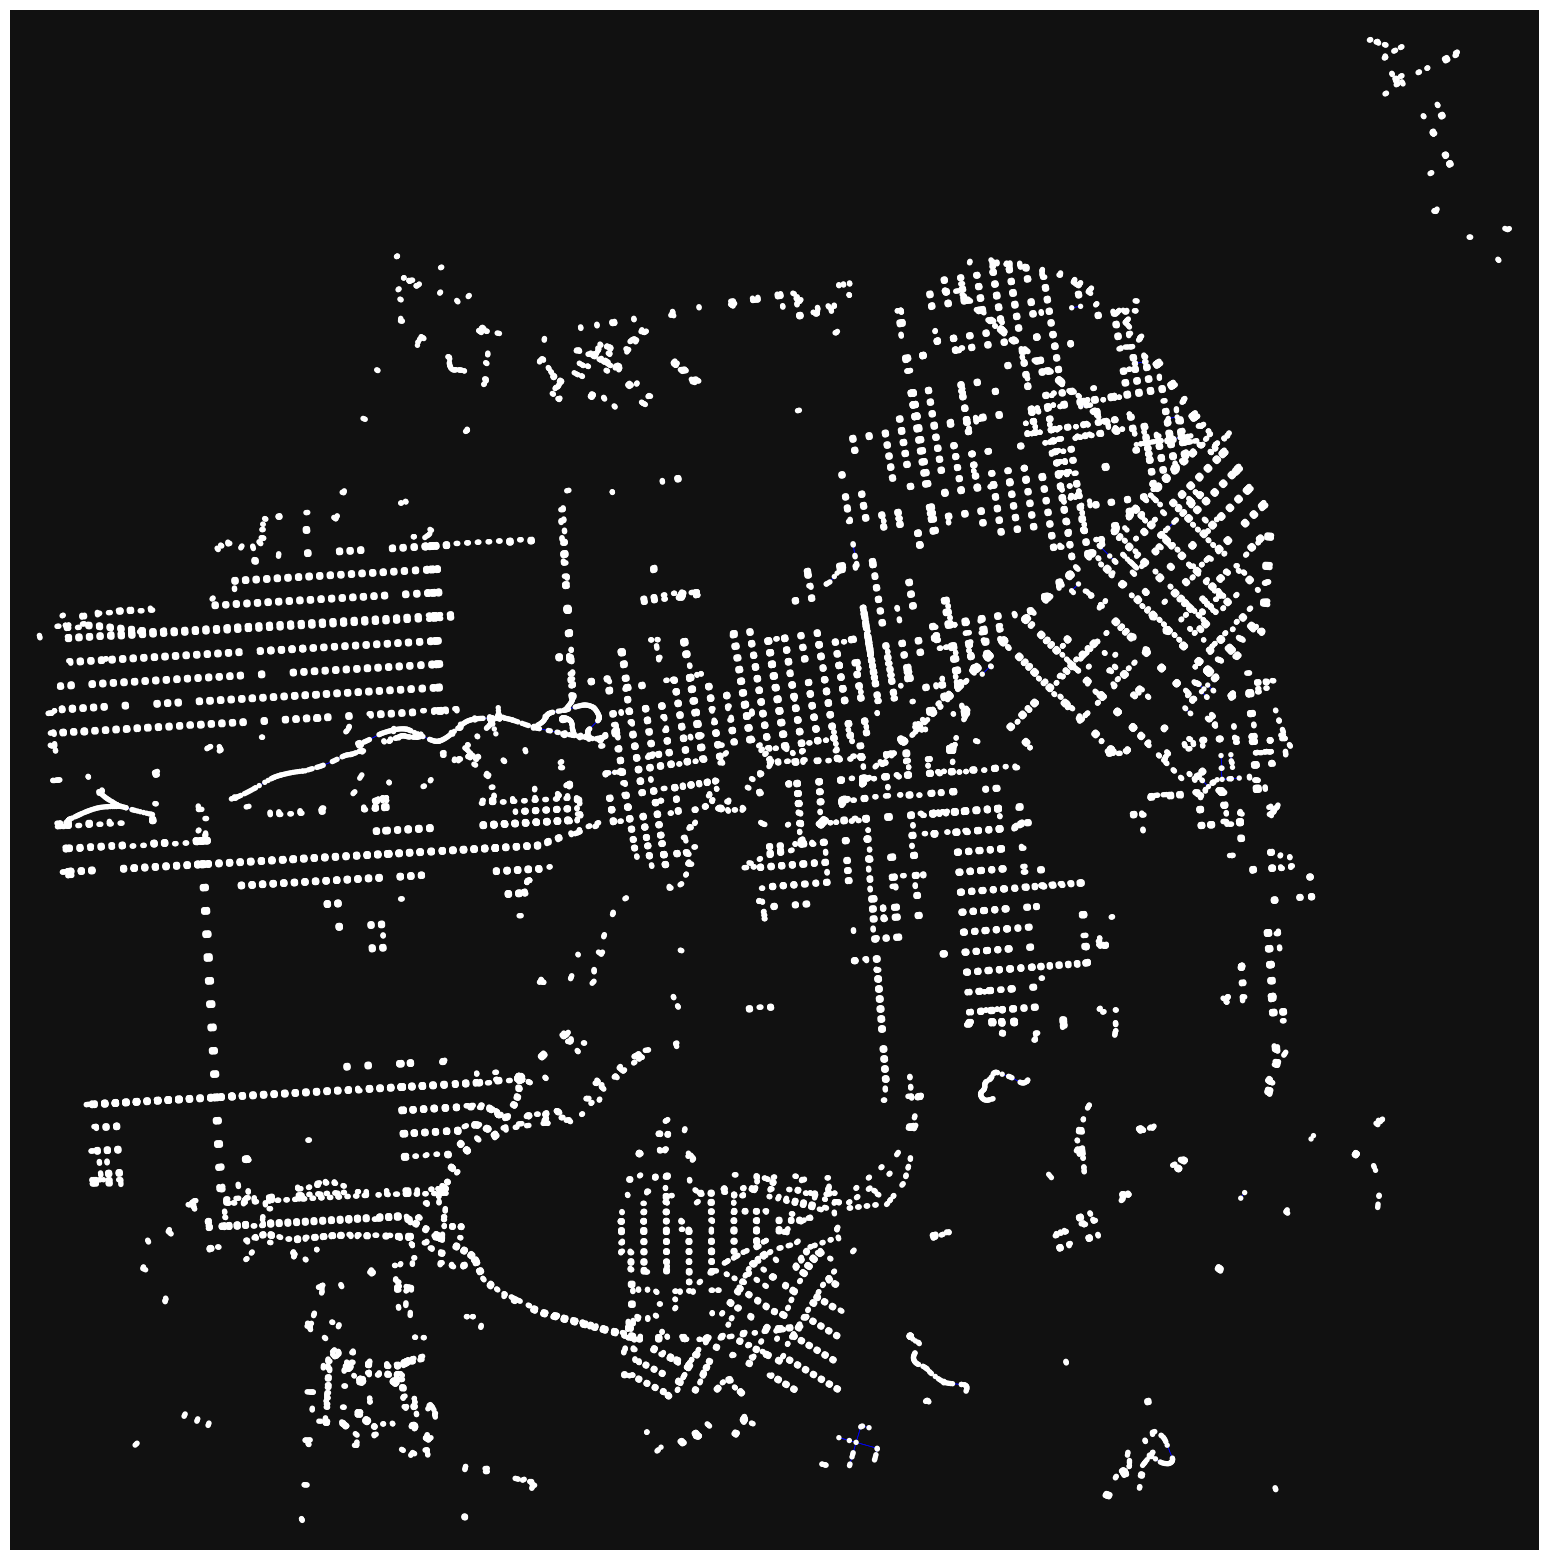

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [4]:
# Set console logging to True
ox.settings.log_console = True

# Set useful tags for walking network
useful_tags = ox.settings.useful_tags_way + [
    'crossing', 'crossing:uncontrolled', 'crossing:zebra', 'crossing:marked',
    'crossing:traffic_signals', 'crossing:school', 'crossing:island',
    'crossing:refuge_island', 'crossing:island:central',
    'crossing:island:central:traffic_signals', 'crossing:island:central:marked',
    'crossing:island:central:zebra', 'crossing:unmarked', 'highway:crossing',
    'pedestrian', 'footway', 'pedestrian_crossing'
]

ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# Download the network with specified tags
G = ox.graph_from_place(query='San Francisco, California, USA', network_type='all', simplify=False, retain_all=True)


# Identify and remove non-walk edges
non_walk = []
for u, v, k, d in G.edges(keys=True, data=True):
    is_walk = "walk" in d and d["walk"] == "designated"
    is_crossing = (
        d.get("highway") in ["crossing", "pedestrian"] or
        "crossing" in d or
        any(tag.lower() == "crossing:uncontrolled" for tag in d) or
        "crossing:raised" in d or
        "crossing:speed_table" in d or
        "crossing:hump" in d or
        "crossing:zebra" in d or
        "crossing:marked" in d or
        "crossing:traffic_signals" in d or
        "crossing:school" in d or
        "crossing:island" in d or
        "crossing:refuge_island" in d or
        "crossing:island:central" in d or
        "crossing:central_island" in d or
        "crossing:island:central:traffic_signals" in d or
        "crossing:island:central:marked" in d or
        "crossing:island:central:zebra" in d or
        "crossing:island:central:uncontrolled" in d or
        "crossing:island:central:unmarked" in d or
        "crossing:unmarked" in d or
        "highway:crossing" in d or
        "pedestrian" in d
    )
    
    # Include pedestrian crossings at intersections without traffic signals
    is_intersection = "highway" in d and d["highway"] == "uncontrolled_intersection"
    if is_intersection and not is_crossing:
        is_crossing = True

    # Exclude pedestrian sidewalks
    is_sidewalk = "sidewalk" in d
    if not is_walk and not is_crossing and not is_sidewalk:
        non_walk.append((u, v, k))

G.remove_edges_from(non_walk)
# G = ox.utils_graph.remove_isolated_nodes(G)
# G = ox.simplify_graph(G)

# Calculate and print total edge length
stats = ox.stats.basic_stats(G)
print("Total Edge Length:", stats["edge_length_total"])

# Plot the graph
ox.plot_graph(G, node_color="w", node_size=15, edge_color="b", edge_linewidth=0.5, figsize=(20, 20))

Test 3: Getting network with a stricter crossing filter

C:\Users\98245\AppData\Local\Temp\ipykernel_49476\1213797121.py:14: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)


Total Edge Length: 325857.94799999904


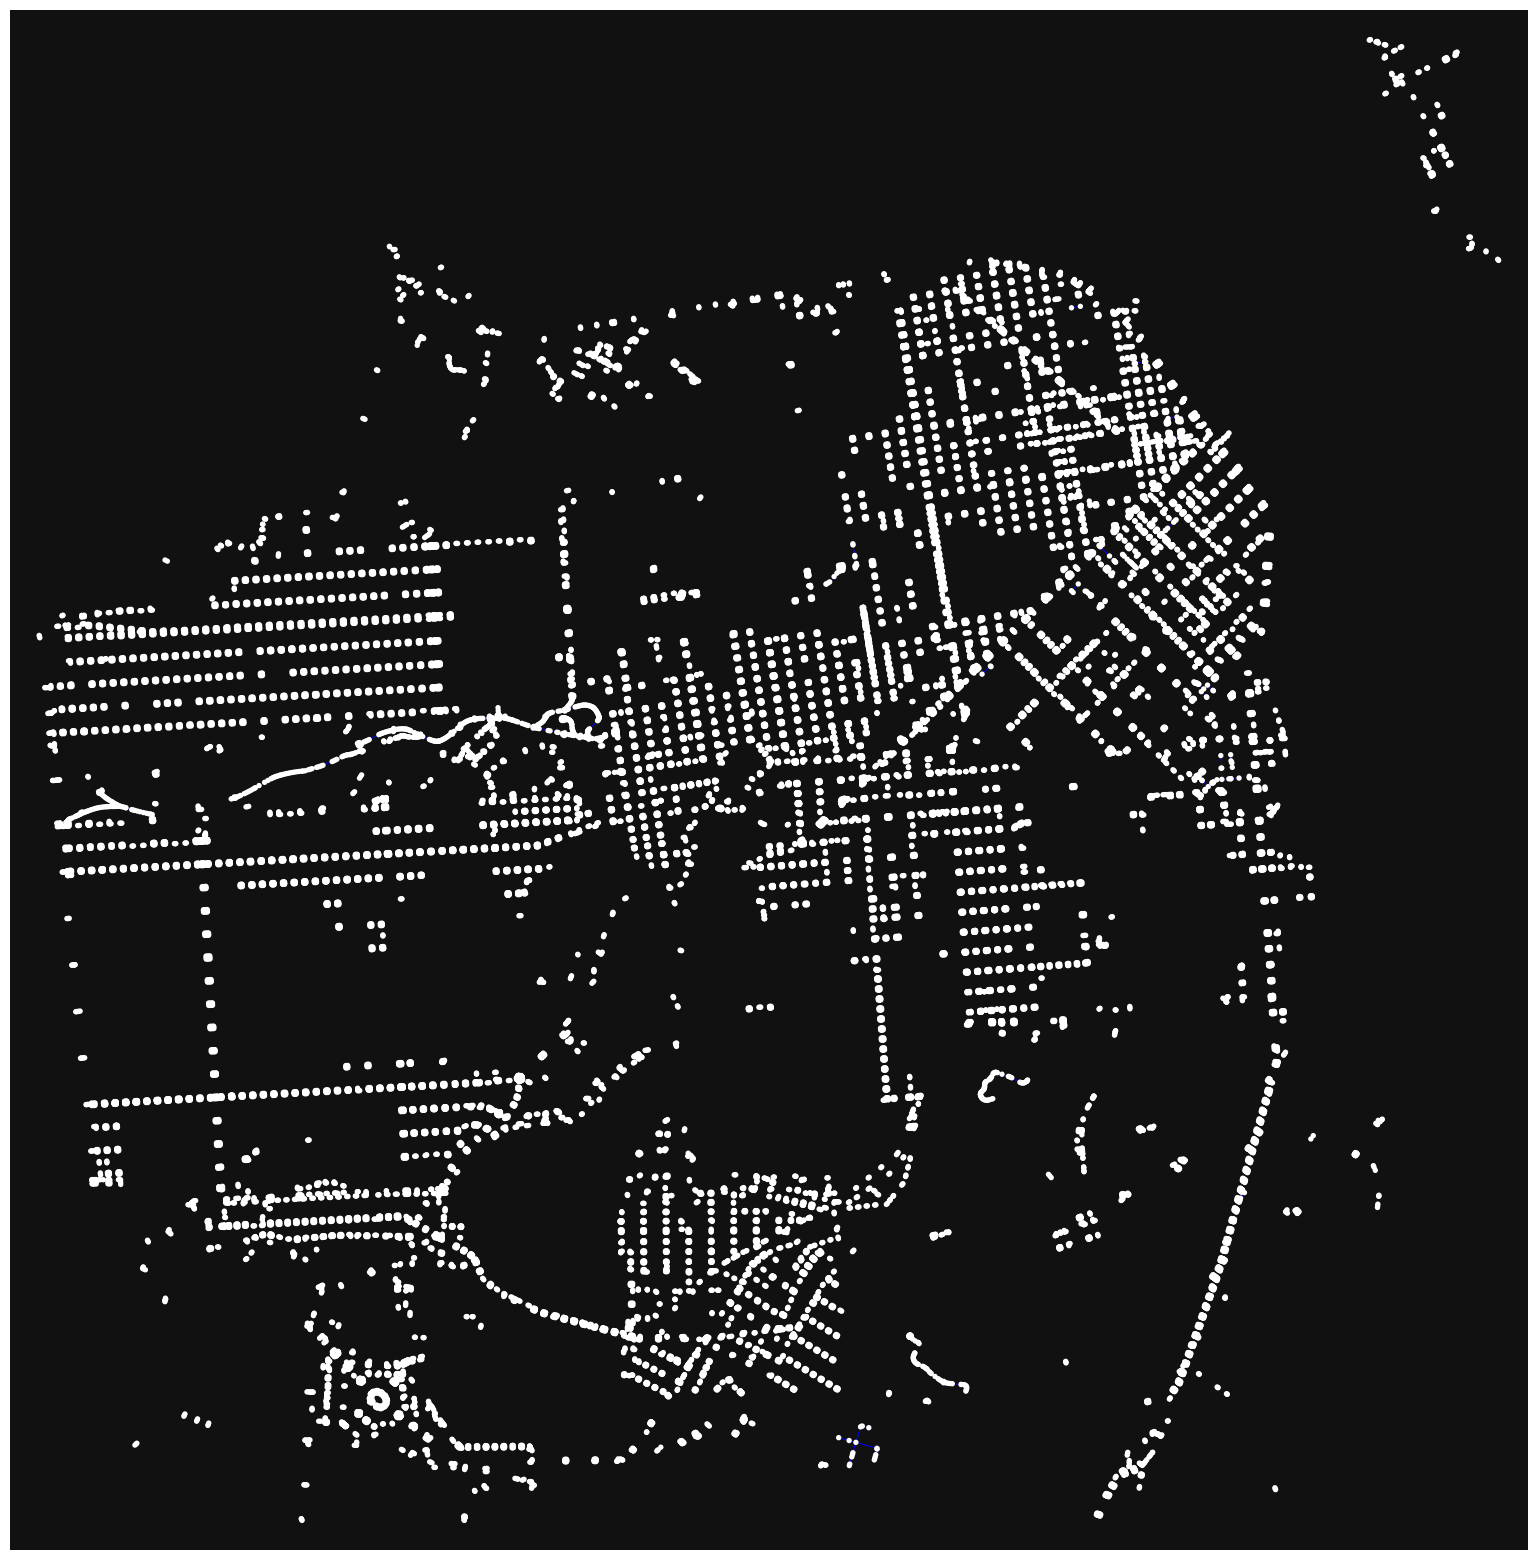

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [6]:
# Set console logging to True
ox.settings.log_console = True

# Set useful tags for walking network
useful_tags = ox.settings.useful_tags_way + [
    'crossing', 'crossing:uncontrolled', 'crossing:zebra', 'crossing:marked',
    'crossing:traffic_signals', 'crossing:school', 'crossing:island',
    'crossing:refuge_island', 'crossing:island:central',
    'crossing:island:central:traffic_signals', 'crossing:island:central:marked',
    'crossing:island:central:zebra', 'crossing:unmarked', 'highway:crossing',
    'pedestrian', 'footway', 'pedestrian_crossing'
]

ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# Download the network with specified tags
G = ox.graph_from_place(query='San Francisco, California, USA', network_type='all', simplify=False, retain_all=True)


# Identify and remove non-walk edges
non_walk = []
for u, v, k, d in G.edges(keys=True, data=True):
    is_walk = "walk" in d and d["walk"] == "designated"
    is_crossing = (
        d.get("highway") in ["crossing", "pedestrian"] or
        d.get("footway") == "crossing" or # Change crossing in d to a stricter filter, excluding cycleway crossings
        any(tag.lower() == "crossing:uncontrolled" for tag in d) or
        "crossing:raised" in d or
        "crossing:speed_table" in d or
        "crossing:hump" in d or
        "crossing:zebra" in d or
        "crossing:marked" in d or
        "crossing:traffic_signals" in d or
        "crossing:school" in d or
        "crossing:island" in d or
        "crossing:refuge_island" in d or
        "crossing:island:central" in d or
        "crossing:central_island" in d or
        "crossing:island:central:traffic_signals" in d or
        "crossing:island:central:marked" in d or
        "crossing:island:central:zebra" in d or
        "crossing:island:central:uncontrolled" in d or
        "crossing:island:central:unmarked" in d or
        "crossing:unmarked" in d or
        "highway:crossing" in d or
        "pedestrian" in d
    )
    
    # Include pedestrian crossings at intersections without traffic signals
    is_intersection = "highway" in d and d["highway"] == "uncontrolled_intersection"
    if is_intersection and not is_crossing:
        is_crossing = True

    # Exclude pedestrian sidewalks
    is_sidewalk = "sidewalk" in d
    if not is_walk and not is_crossing and not is_sidewalk:
        non_walk.append((u, v, k))

G.remove_edges_from(non_walk)
# G = ox.utils_graph.remove_isolated_nodes(G)
# G = ox.simplify_graph(G)

# Calculate and print total edge length
stats = ox.stats.basic_stats(G)
print("Total Edge Length:", stats["edge_length_total"])

# Plot the graph
ox.plot_graph(G, node_color="w", node_size=15, edge_color="b", edge_linewidth=0.5, figsize=(20, 20))

### Convert the resulting graph to KML for visual exploration in Google Earth

In [76]:
# Convert the graph to a GeoDataFrame (just the edges for visualization purposes)
edges = ox.utils_graph.graph_to_gdfs(G, nodes=False)

# Initialize the KML object
kml = simplekml.Kml()

# Loop through the edges GeoDataFrame and add each edge to the KML
for idx, row in edges.iterrows():
    # Extract the coordinates from the geometry
    coords = list(zip(row['geometry'].xy[0], row['geometry'].xy[1]))
    
    # Create a LineString for the edge
    linestring = kml.newlinestring(coords=coords)
    
    # Customize the line style (optional)
    linestring.style.linestyle.width = 6  # Line width
    linestring.style.linestyle.color = simplekml.Color.deepskyblue # Line color (red)

# Save the KML file
kml.document.name = "Test_stricter_crossing"

document_name = "san_francisco_walk_network_stricter_crossing.kml"
kml.save(document_name)

print(f"KML file created: {document_name}")

KML file created: san_francisco_walk_network_stricter_crossing.kml


In [ ]:
### Before & after comparisons

In [60]:
def compare_graph_stats(G1, G2):
    # Get basic statistics for both graphs
    stats_before = ox.basic_stats(G1)
    stats_after = ox.basic_stats(G2)
    
    # Compare number of edges and nodes
    num_edges_before = len(G1.edges())
    num_edges_after = len(G2.edges())
    num_nodes_before = len(G1.nodes())
    num_nodes_after = len(G2.nodes())
    
    # Compare total edge length
    total_edge_length_before = stats_before["edge_length_total"]
    total_edge_length_after = stats_after["edge_length_total"]
    
    # Compare density (edges per node)
    density_before = num_edges_before / num_nodes_before
    density_after = num_edges_after / num_nodes_after
    
    # Display results
    print(f"Number of edges before: {num_edges_before}, after: {num_edges_after}")
    print(f"Number of nodes before: {num_nodes_before}, after: {num_nodes_after}")
    print(f"Total edge length before: {total_edge_length_before} meters, after: {total_edge_length_after} meters")
    print(f"Density (edges per node) before: {density_before}, after: {density_after}")

### Original: the original code provided in PCD_OSMnx_Downloads.ipynb. Rerun and renamed to "G_baseline" for comparisons

C:\Users\98245\AppData\Local\Temp\ipykernel_16496\2785278730.py:14: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)


Total Edge Length: 193477.92999999932


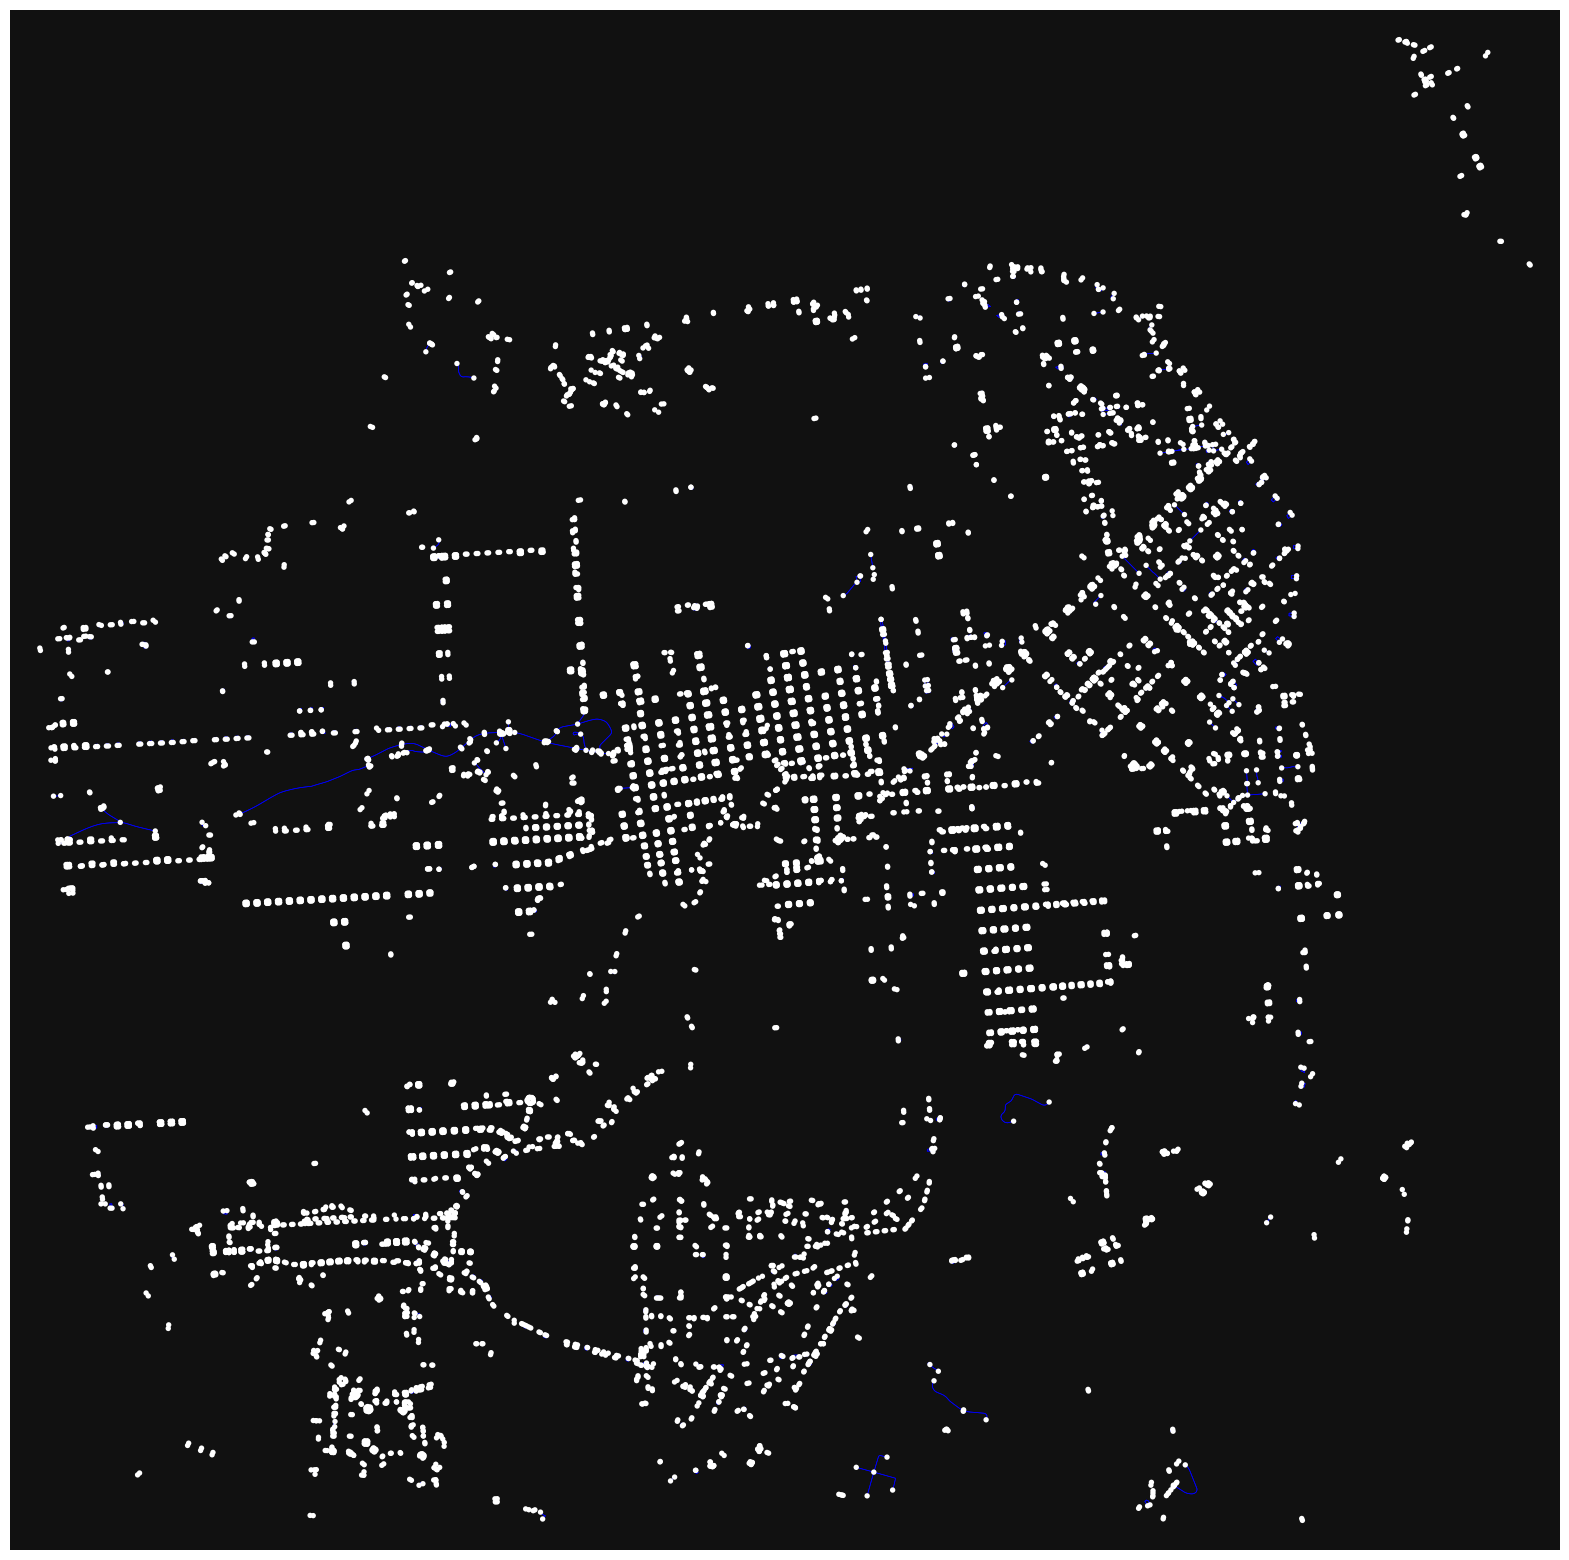

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [70]:
# Set console logging to True
ox.settings.log_console = True

# Set useful tags for walking network
useful_tags = ox.settings.useful_tags_way + [
    'crossing', 'crossing:uncontrolled', 'crossing:zebra', 'crossing:marked',
    'crossing:traffic_signals', 'crossing:school', 'crossing:island',
    'crossing:refuge_island', 'crossing:island:central',
    'crossing:island:central:traffic_signals', 'crossing:island:central:marked',
    'crossing:island:central:zebra', 'crossing:unmarked', 'highway:crossing',
    'pedestrian', 'footway', 'pedestrian_crossing'
]

ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

# Download the network with specified tags
G_baseline = ox.graph_from_place(query='San Francisco, California, USA', network_type='walk', simplify=False, retain_all=True)

# Identify and remove non-walk edges
non_walk = []
for u, v, k, d in G_baseline.edges(keys=True, data=True):
    is_walk = "walk" in d and d["walk"] == "designated"
    is_crossing = (
        d.get("highway") in ["crossing", "pedestrian"] or
        "crossing" in d or
        any(tag.lower() == "crossing:uncontrolled" for tag in d) or
        "crossing:raised" in d or
        "crossing:speed_table" in d or
        "crossing:hump" in d or
        "crossing:zebra" in d or
        "crossing:marked" in d or
        "crossing:traffic_signals" in d or
        "crossing:school" in d or
        "crossing:island" in d or
        "crossing:refuge_island" in d or
        "crossing:island:central" in d or
        "crossing:central_island" in d or
        "crossing:island:central:traffic_signals" in d or
        "crossing:island:central:marked" in d or
        "crossing:island:central:zebra" in d or
        "crossing:island:central:uncontrolled" in d or
        "crossing:island:central:unmarked" in d or
        "crossing:unmarked" in d or
        "highway:crossing" in d or
        "pedestrian" in d
    )

    # Include pedestrian crossings at intersections without traffic signals
    is_intersection = "highway" in d and d["highway"] == "uncontrolled_intersection"
    if is_intersection and not is_crossing:
        is_crossing = True

    # Exclude pedestrian sidewalks
    is_sidewalk = "sidewalk" in d
    if not is_walk and not is_crossing and not is_sidewalk:
        non_walk.append((u, v, k))

G_baseline.remove_edges_from(non_walk)
G_baseline = ox.utils_graph.remove_isolated_nodes(G_baseline)
G_baseline = ox.simplify_graph(G_baseline)

# Calculate and print total edge length
stats = ox.stats.basic_stats(G_baseline)
print("Total Edge Length:", stats["edge_length_total"])

# Plot the graph
ox.plot_graph(G_baseline, node_color="w", node_size=15, edge_color="b", edge_linewidth=0.5, figsize=(20, 20))


### Compare the original graph with any of the graphs from tests

In [77]:
compare_graph_stats(G_baseline, G)

Number of edges before: 8750, after: 44396
Number of nodes before: 8379, after: 26498
Total edge length before: 193477.92999999932 meters, after: 325857.94799999904 meters
Density (edges per node) before: 1.0442773600668338, after: 1.675447203562533
